# Fitting various curves in order to estimate peak

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from math import log
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\case_time_series.csv')

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
df.tail(10)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
131,09 June,9981,276002,5634,134653,272,7749
132,10 June,11156,287158,6275,140928,358,8107
133,11 June,11135,298293,6044,146972,394,8501
134,12 June,11306,309599,7263,154235,388,8889
135,13 June,12039,321638,8092,162327,309,9198
136,14 June,11405,333043,7358,169685,324,9522
137,15 June,10032,343075,10639,180324,396,9918
138,16 June,11086,354161,7226,187550,2004,11922
139,17 June,13108,367269,6890,194440,341,12263
140,18 June,13826,381095,10744,205184,343,12606


In [5]:
len(df)

141

In [6]:
df['Day'] = range(len(df))

In [7]:
df['Total Active'] = df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']
df['Daily Active'] = df['Daily Confirmed'] - df['Daily Recovered'] - df['Daily Deceased']
df['Daily Active Outlier Fixed'] = df['Daily Active'][df['Daily Active']> -3000] #removed the outlier
df['Daily Active Outlier Fixed'] = df['Daily Active Outlier Fixed'].fillna((3907+3856)/2) #and replaced by average of values

In [8]:
df.tail(10)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Total Active,Daily Active,Daily Active Outlier Fixed
131,09 June,9981,276002,5634,134653,272,7749,131,133600,4075,4075.0
132,10 June,11156,287158,6275,140928,358,8107,132,138123,4523,4523.0
133,11 June,11135,298293,6044,146972,394,8501,133,142820,4697,4697.0
134,12 June,11306,309599,7263,154235,388,8889,134,146475,3655,3655.0
135,13 June,12039,321638,8092,162327,309,9198,135,150113,3638,3638.0
136,14 June,11405,333043,7358,169685,324,9522,136,153836,3723,3723.0
137,15 June,10032,343075,10639,180324,396,9918,137,152833,-1003,-1003.0
138,16 June,11086,354161,7226,187550,2004,11922,138,154689,1856,1856.0
139,17 June,13108,367269,6890,194440,341,12263,139,160566,5877,5877.0
140,18 June,13826,381095,10744,205184,343,12606,140,163305,2739,2739.0


Biquadratic equation fitting, fits perfectly

In [9]:
fit1 = np.polyfit(df.Day, df['Total Active'], 4)

In [10]:
Cases = []
for i in df.Day:
    Cases.append((fit1[0]*(i**4))+(fit1[1]*(i**3))+(fit1[2]*(i**2))+(fit1[3]*(i))+fit1[4])    

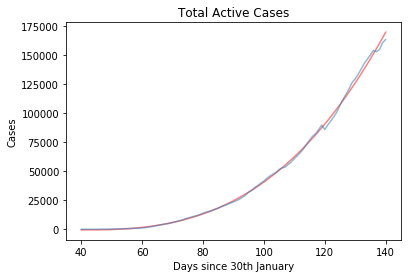

In [11]:
plt.plot(df.Day[40:], Cases[40:], color='red', alpha = 0.5)
plt.plot(df.Day[40:], df['Total Active'][40:], alpha = 0.5)
plt.title('Total Active Cases')
plt.ylabel('Cases')
plt.xlabel('Days since 30th January')
plt.show()

In [12]:
Extended = []
for i in range(175):
    Extended.append((fit1[0]*(i**4))+(fit1[1]*(i**3))+(fit1[2]*(i**2))+(fit1[3]*(i))+fit1[4])  

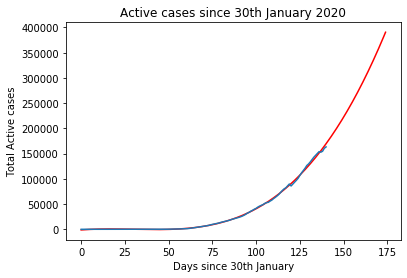

In [13]:
plt.plot(range(175), Extended, color='red')
plt.plot(df.Day, df['Total Active'])
plt.title('Active cases since 30th January 2020')
plt.xlabel('Days since 30th January')
plt.ylabel('Total Active cases')
plt.show()

In [14]:
fit2 = np.polyfit(df.Day, df['Daily Active Outlier Fixed'], 3)

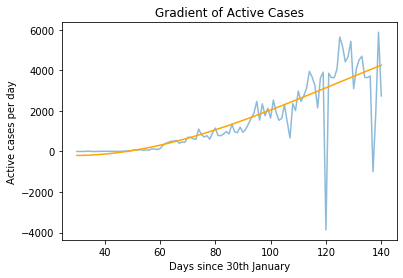

In [15]:
Slope = []
for i in df.Day:
    Slope.append((fit2[0]*(i**3))+(fit2[1]*(i**2))+(fit2[2]*(i))+fit2[3])    
plt.plot(range(len(df['Daily Active']))[30:], df['Daily Active'][30:], alpha = 0.5)
plt.plot(df.Day[30:], Slope[30:], color='orange')
plt.title('Gradient of Active Cases')
plt.xlabel('Days since 30th January')
plt.ylabel('Active cases per day')
plt.show()

In [16]:
np.polyfit(df.Day, np.gradient(Slope), 3)

array([-2.28829771e-07, -6.23097414e-03,  1.55007283e+00, -3.98080646e+01])

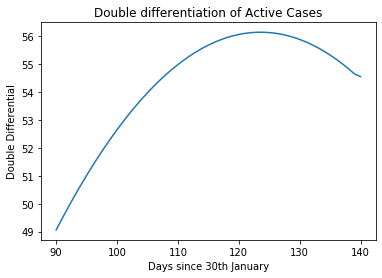

In [17]:
DD = []
for i in df.Day:
    DD.append((-1.10791116e-06*(i**3))-(3.39096516e-02*(i**2))+(-2.03002265e+00*(i))+2.68147422e+01)    
plt.plot(range(len(np.gradient(Slope)))[90:], np.gradient(Slope)[90:])
# plt.plot(df.Day, DD, color='orange')
plt.title('Double differentiation of Active Cases')
plt.xlabel('Days since 30th January')
plt.ylabel('Double Differential')
plt.show()

Checking characteristics of a normal biquadratic curve

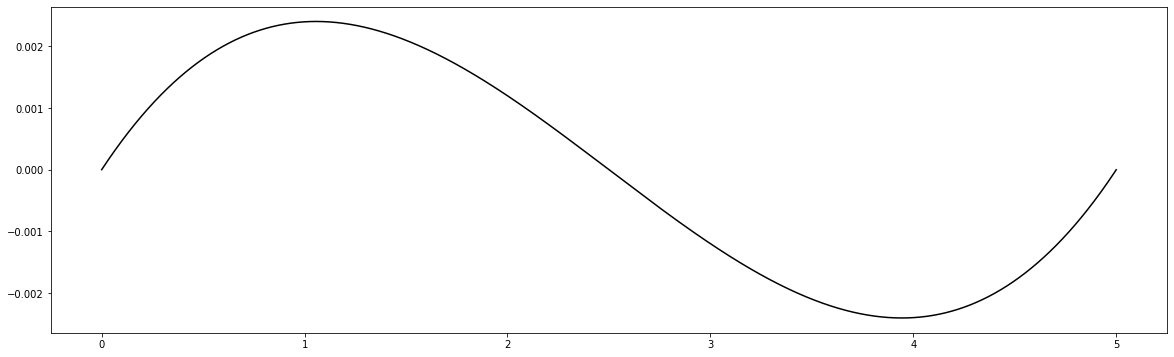

<Figure size 1440x432 with 0 Axes>

In [18]:
plt.rcParams['figure.figsize'] = (20, 6)
X = []
i = 0.0001
while(i<=5):
    X.append(i)
    i += 0.0001
y = [(x**4)-10*(x**3)+25*(x**2) for x in X]
yd = np.gradient(y)
ydd = np.gradient(yd)
# plt.plot(X, y, color='red')
plt.plot(X, yd, color = 'black')
# plt.plot(X, ydd)
plt.show()
plt.clf()

Logarithmic curve fitting, will start from day 80 for better curve fitting

In [19]:
logx = np.log(df['Total Active'][80:])
np.polyfit(df.Day[80:], logx, 1)

array([0.04145478, 6.38840106])

In [20]:
x_data = df.Day[80:]
y_data = df['Total Active'][80:]

log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)

[0.04145478 6.38840106]


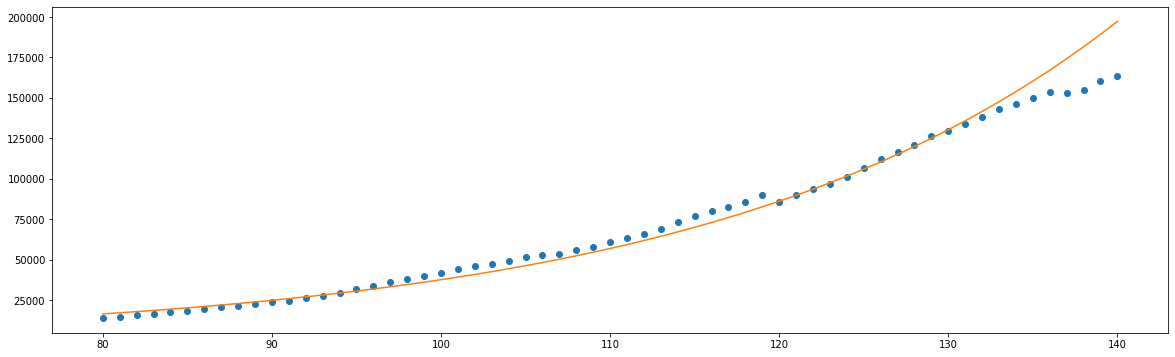

In [21]:
y = [np.exp(curve_fit[1])*np.exp(curve_fit[0]*x) for x in x_data]
plt.plot(x_data, y_data, "o")
plt.plot(x_data, y)
plt.show()

In all cases, India is not moving exponentially high, the cases are better fitted in bi quadratic for now. Now we shall fit data of worst hit districts.

In [22]:
sw = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\state_wise_daily.csv')

In [23]:
sw.tail()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
286,17-Jun-20,Recovered,6890,0,128,3,231,205,4,165,...,77,505,0,842,44,0,335,38,505,0
287,17-Jun-20,Deceased,341,0,2,0,0,0,0,0,...,6,5,0,48,1,0,30,1,11,0
288,18-Jun-20,Confirmed,13826,1,425,0,209,100,4,82,...,118,315,0,2141,352,21,604,80,435,430
289,18-Jun-20,Recovered,10744,2,131,1,206,185,0,103,...,32,275,1,1017,230,83,399,132,468,0
290,18-Jun-20,Deceased,343,0,2,0,1,5,0,0,...,5,17,0,49,3,0,23,0,12,0


In [24]:
sw.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


We will modify the dataframe such that it has active cases in each state corresponding to dates

Steps used:
Date is from 14th March to 6th June, 3 times repeated in sequence C, R, D
Select only relevant states
convert data frame to list
subtract every second and third value from first value in list
convert this list to dataframe
add days column as index (it will be days since 14th of March)

In [25]:
sw = sw.drop(columns=['Date', 'Status'])

In [26]:
mh = sw[['MH']]

In [27]:
mh.head()

,MH
0,14
1,0
2,0
3,18
4,0


In [28]:
mh = mh.values.tolist()

In [29]:
mh[0:2]

[[14], [0]]

In [30]:
mod = []
for i in range(len(mh)):
    if(i%3==0):
        x = mh[i][0]-mh[i+1][0]-mh[i+2][0]
        mod.append(x)
mod = pd.DataFrame(mod, columns = ['Active Cases'])
mod.tail(10)

,Active Cases
87,474
88,1228
89,1893
90,1648
91,1764
92,1638
93,-2463
94,-510
95,1878
96,1980


In [31]:
mod['Days'] = range(len(mod))

In [32]:
mod['Active Cases Corrected'] = mod['Active Cases']

In [33]:
mod['Active Cases Corrected'][76] = (mod['Active Cases'][75]+mod['Active Cases'][77])/2 #Fixing outlier

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
coef = np.polyfit(mod.Days, mod['Active Cases Corrected'], 4)

In [35]:
y = coef[0]*(mod.Days**4)+coef[1]*(mod.Days**3)+coef[2]*(mod.Days**2)+coef[3]*(mod.Days)+coef[4]

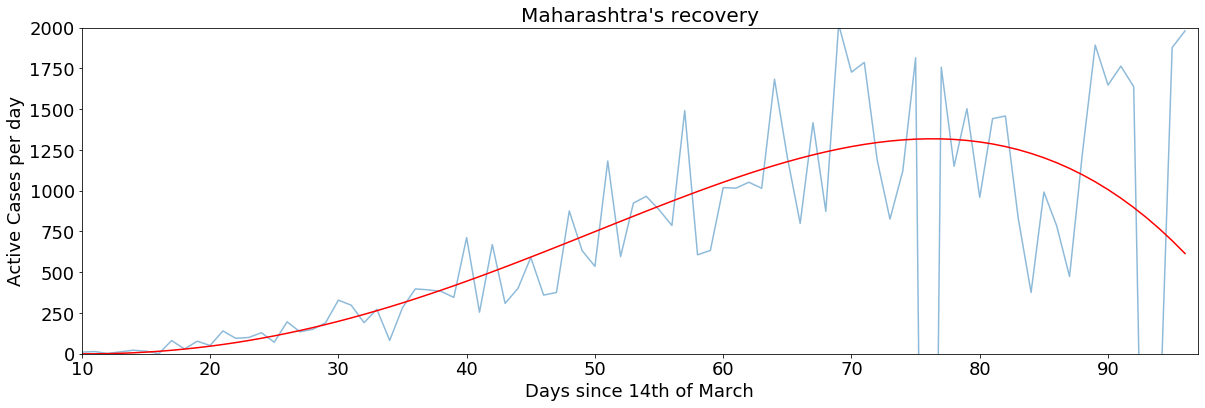

In [36]:
plt.plot(mod.Days, mod['Active Cases'], alpha = 0.5)
plt.plot(mod.Days, y, color='red')
plt.axis((10, len(mod), 0, 2000))
plt.title('Maharashtra\'s recovery', fontsize = 20)
plt.ylabel('Active Cases per day', fontsize = 18)
plt.xlabel('Days since 14th of March', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

We can predict Mh's case:

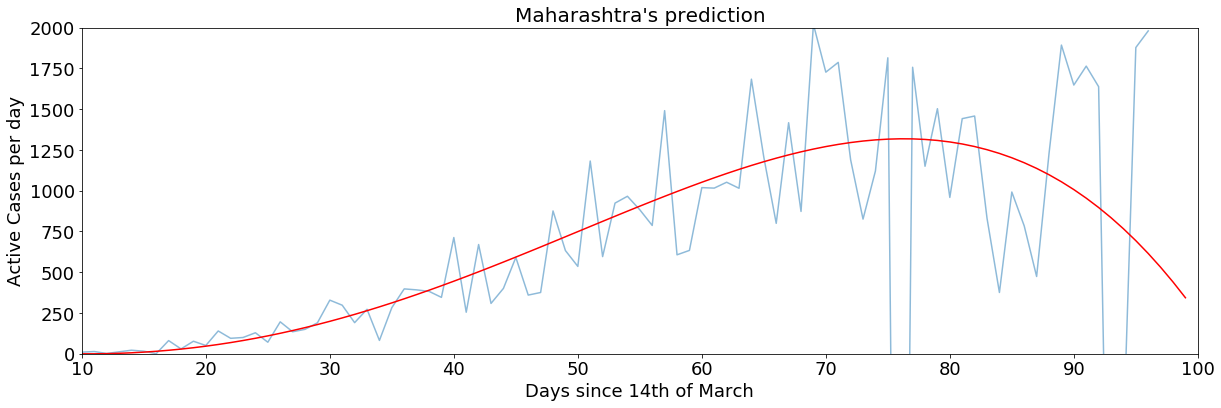

In [37]:
plt.plot(mod.Days, mod['Active Cases'], alpha = 0.5)
day = range(100)
y = [coef[0]*(days**4)+coef[1]*(days**3)+coef[2]*(days**2)+coef[3]*(days)+coef[4] for days in day]
plt.plot(day, y, color='red')
plt.axis((10, len(day), 0, 2000))
plt.title('Maharashtra\'s prediction', fontsize = 20)
plt.ylabel('Active Cases per day', fontsize = 18)
plt.xlabel('Days since 14th of March', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [38]:
print(max(y))
I = 0
for i in range(len(y)):
    if(y[i]==max(y)):
        print(day[i])
        I=  i
peak = day[I]

1318.3470454955016
76


Assuming symmtrical trend instead of right skew, let's plot one for mirror image from day 72

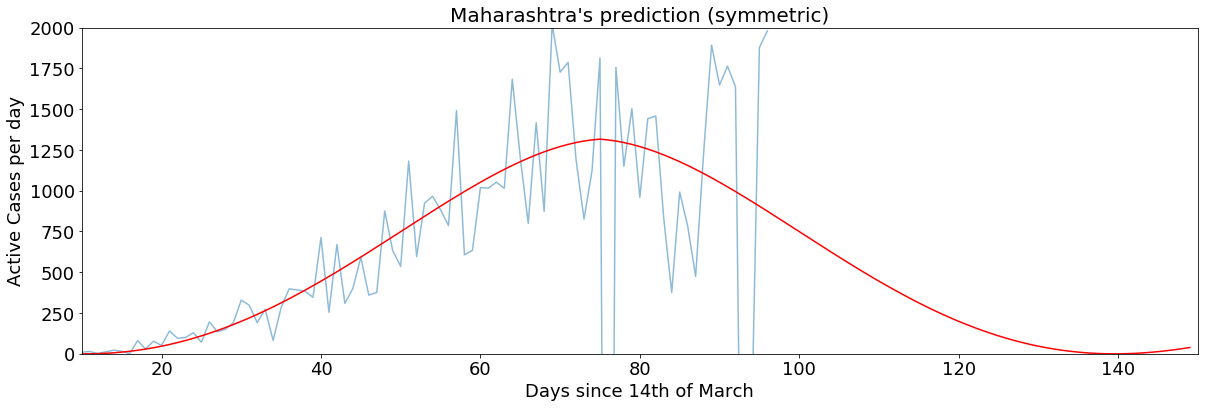

In [39]:
plt.plot(mod.Days, mod['Active Cases'], alpha = 0.5)
day = range(peak)
y = [coef[0]*(days**4)+coef[1]*(days**3)+coef[2]*(days**2)+coef[3]*(days)+coef[4] for days in day]
yd = []
for i in range(2*(peak-1)):
    if(i<=(peak-1)):
        yd.append(y[i])
    else:
        yd.append(y[2*(peak-1)-i])
plt.plot(range(len(yd)), yd, color='red')
plt.axis((10, len(yd), 0, 2000))
plt.title('Maharashtra\'s prediction (symmetric)', fontsize = 20)
plt.ylabel('Active Cases per day', fontsize = 18)
plt.xlabel('Days since 14th of March', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [40]:
total = []
x = 0
ac = mod['Active Cases'].tolist()
for i in ac:
    x += i
    total.append(x)

In [41]:
coef = np.polyfit(mod.Days, total, 2)

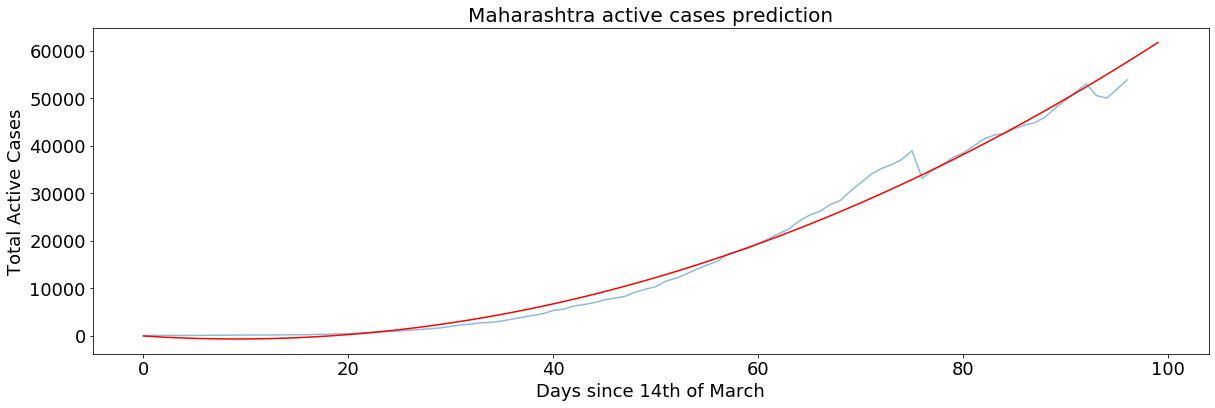

In [42]:
plt.plot(mod.Days, total, alpha = 0.5)
day = range(100)
y = [coef[0]*(days**2)+coef[1]*(days)+coef[2] for days in day]
plt.plot(day, y, color='red')
plt.title('Maharashtra active cases prediction', fontsize = 20)
plt.ylabel('Total Active Cases', fontsize = 18)
plt.xlabel('Days since 14th of March', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()